In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,586 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import re
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 

In [3]:
train = pd.read_csv('/content/drive/MyDrive/빅콘/홍수ZERO/Data/dam_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅콘/홍수ZERO/Data/dam_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/빅콘/홍수ZERO/Data/submission.csv')

In [4]:
train.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1,2006,7,10,8,189.1,6.4,7,7,7,8,2.5,122.6,6.3,7,7,7,8,2.5,122.5,6.3,7,7,7,8,2.5,122.6,6.4,7,7,8,8,2.5,122.7,6.4,7,7,8,8,2.5,122.7,6.4,7,7,8,8,2.5,122.6
1,1,2006,7,10,9,217.0,6.3,7,8,7,8,2.5,122.6,6.4,7,8,7,8,2.5,122.6,6.4,7,8,7,8,2.5,122.6,7.3,7,8,10,10,2.5,122.7,7.3,7,8,10,10,2.5,122.6,7.3,7,8,10,10,2.5,122.6
2,1,2006,7,10,10,251.4,6.4,7,9,7,8,2.5,122.6,7.3,7,9,7,8,2.5,122.6,7.3,7,9,8,8,2.5,122.6,8.2,7,9,10,11,2.5,122.7,8.2,7,9,10,11,2.5,122.6,8.2,7,9,10,11,2.5,122.6


In [5]:
test.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,26,2018,7,1,6,NaN,14.3,32,0,0,0,1.9,120.5,11.0,32,0,0,0,1.9,120.5,11.0,32,0,0,0,1.9,120.5,7.9,32,0,1,0,1.9,120.5,1.1,32,0,1,0,1.9,120.5,0.8,32,0,1,0,1.9,120.5
1,26,2018,7,1,7,NaN,11.0,20,1,0,0,1.9,120.5,7.9,20,1,0,0,1.9,120.5,7.9,20,1,0,0,1.9,120.5,7.9,21,1,14,8,1.9,120.5,5.1,21,1,14,8,1.9,120.5,4.8,21,1,14,8,1.9,120.5
2,26,2018,7,1,8,NaN,7.9,11,5,0,0,1.9,120.5,7.9,12,5,0,0,1.9,120.5,7.9,12,5,1,0,1.9,120.5,13.3,21,5,19,24,1.9,120.5,13.3,21,5,19,24,1.9,120.5,12.9,21,5,19,24,1.9,120.5


In [6]:
submission.head(3)

,NO,홍수사상번호,연,월,일,시간,유입량
0,1,26,2018,7,1,6,NaN
1,2,26,2018,7,1,7,NaN
2,3,26,2018,7,1,8,NaN


In [7]:
train.describe()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
count,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,14.324801,2010.765825,7.426496,15.719474,12.534763,1746.902802,68.196783,79.865790,64.320996,40.029747,53.355240,4.586683,131.871117,68.709443,83.111726,63.459011,39.464199,53.355240,4.586683,131.940678,68.709443,83.111726,57.274991,39.700796,53.777240,4.586683,131.976963,69.213213,84.734694,57.274991,51.492909,55.565202,4.586683,131.715150,67.435905,84.734694,57.274991,51.492909,55.565202,4.586683,131.758354,61.934037,84.734694,58.176064,39.168108,53.470771,4.586683,131.805707
std,7.309046,2.717014,0.701242,7.594878,6.947735,2181.791268,60.221829,72.820217,64.530822,45.931246,56.709941,2.422604,6.007716,60.168899,73.870215,64.041185,45.330341,56.709941,2.422604,6.009126,60.168899,73.870215,60.574060,45.295280,56.726475,2.422604,6.006414,60.106651,74.374884,60.574060,52.108792,57.249386,2.422604,5.989125,59.198900,74.374884,60.574060,52.108792,57.249386,2.422604,5.994414,56.415913,74.374884,61.082018,44.579800,56.013723,2.422604,6.003663
min,1.000000,2006.000000,6.000000,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,118.700000
25%,9.000000,2009.000000,7.000000,11.000000,7.000000,384.750000,19.600000,23.000000,13.000000,3.000000,6.500000,2.700000,127.600000,20.100000,23.500000,13.000000,3.000000,6.500000,2.700000,127.600000,20.100000,23.500000,9.000000,3.000000,7.000000,2.700000,127.600000,20.700000,25.000000,9.000000,10.000000,9.000000,2.700000,127.450000,19.650000,25.000000,9.000000,10.000000,9.000000,2.700000,127.500000,15.300000,25.000000,9.000000,3.000000,7.000000,2.700000,127.500000
50%,16.000000,2011.000000,7.000000,15.000000,13.000000,1065.500000,58.900000,55.000000,51.000000,22.000000,34.000000,4.100000,133.300000,59.400000,58.000000,49.000000,22.000000,34.000000,4.100000,133.300000,59.400000,58.000000,43.000000,22.000000,35.000000,4.100000,133.300000,59.900000,61.000000,43.000000,34.000000,38.000000,4.100000,133.300000,58.300000,61.000000,43.000000,34.000000,38.000000,4.100000,133.300000,47.900000,61.000000,44.000000,22.000000,35.000000,4.100000,133.300000
75%,20.000000,2012.000000,8.000000,21.000000,19.000000,2213.000000,103.250000,123.500000,91.000000,64.000000,85.000000,5.700000,135.300000,103.400000,129.000000,90.000000,64.000000,85.000000,5.700000,135.500000,103.400000,129.000000,84.000000,64.000000,85.000000,5.700000,135.600000,103.400000,130.000000,84.000000,78.000000,86.000000,5.700000,135.200000,101.200000,130.000000,84.000000,78.000000,86.000000,5.700000,135.200000,92.850000,130.000000,85.000000,62.000000,85.000000,5.700000,135.200000
max,25.000000,2017.000000,9.000000,31.000000,24.000000,21504.400000,328.400000,329.000000,367.000000,253.000000,262.000000,16.700000,143.900000,328.400000,337.000000,367.000000,251.000000,262.000000,16.700000,144.000000,328.400000,337.000000,357.000000,251.000000,262.000000,16.700000,144.000000,328.400000

In [8]:
train.corr()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
홍수사상번호,1.000000,0.949192,-0.033990,-0.053224,-0.001309,-0.376750,-0.354827,-0.289963,-0.307554,-0.253998,-0.304671,-0.396770,-0.033713,-0.359795,-0.298614,-0.306045,-0.255531,-0.304671,-0.396770,-0.036249,-0.359795,-0.298614,-0.294650,-0.258529,-0.309497,-0.396770,-0.037747,-0.364652,-0.302931,-0.294650,-0.281820,-0.319957,-0.396770,-0.027998,-0.361989,-0.302931,-0.294650,-0.281820,-0.319957,-0.396770,-0.029590,-0.352809,-0.302931,-0.296312,-0.262354,-0.315737,-0.396770,-0.031210
연,0.949192,1.000000,-0.103384,-0.146855,0.001522,-0.349836,-0.301834,-0.226533,-0.251581,-0.187464,-0.279550,-0.365643,-0.114739,-0.305314,-0.232582,-0.249850,-0.188162,-0.279550,-0.365643,-0.116524,-0.305314,-0.232582,-0.236823,-0.190211,-0.283182,-0.365643,-0.117655,-0.308714,-0.235607,-0.236823,-0.209101,-0.291849,-0.365643,-0.110468,-0.305478,-0.235607,-0.236823,-0.209101,-0.291849,-0.365643,-0.111735,-0.294888,-0.235607,-0.238779,-0.192534,-0.286764,-0.365643,-0.112875
월,-0.033990,-0.103384,1.000000,-0.089601,-0.000097,-0.116182,-0.115713,-0.215437,-0.109360,-0.093396,-0.003750,-0.124303,0.380562,-0.117049,-0.221989,-0.108810,-0.098778,-0.003750,-0.124303,0.380106,-0.117049,-0.221989,-0.108514,-0.101837,-0.005787,-0.124303,0.380003,-0.118528,-0.225260,-0.108514,-0.083471,-0.008351,-0.124303,0.381110,-0.117479,-0.225260,-0.108514,-0.083471,-0.008351,-0.124303,0.381097,-0.118398,-0.225260,-0.108097,-0.107126,-0.012513,-0.124303,0.380947
일,-0.053224,-0.146855,-0.089601,1.000000,-0.021963,0.052060,0.024661,0.012887,0.002911,0.019967,0.022316,0.050098,0.292379,0.020924,0.008702,0.000118,0.019949,0.022316,0.050098,0.290330,0.020924,0.008702,-0.021120,0.019979,0.018311,0.050098,0.289360,0.017082,0.006511,-0.021120,0.018224,0.013410,0.050098,0.297823,0.012964,0.006511,-0.021120,0.018224,0.013410,0.050098,0.296463,-0.000749,0.006511,-0.017728,0.020796,0.010105,0.050098,0.294576
시간,-0.001309,0.001522,-0.000097,-0.021963,1.000000,0.016276,0.019665,0.019656,0.008293,0.020750,0.028399,0.022550,0.008095,0.017209,0.017680,0.008012,0.018494,0.028399,0.022550,0.008027,0.017209,0.017680,0.006732,0.014732,0.027166,0.022550,0.007810,0.014861,0.016055,0.006732,0.006911,0.021947,0.022550,0.006195,0.013998,0.016055,0.006732,0.006911,0.021947,0.022550,0.006519,0.008308,0.016055,0.006126,0.001641,0.018864,0.022550,0.007284
유입량,-0.376750,-0.349836,-0.116182,0.052060,0.016276,1.000000,0.742259,0.617424,0.739950,0.605588,0.700568,0.903896,0.109513,0.752176,0.615217,0.743754,0.626355,0.700568,0.903896,0.124338,0.752176,0.615217,0.771063,0.641772,0.710927,0.903896,0.133526,0.760470,0.612004,0.771063,0.619889,0.722170,0.903896,0.084517,0.767839,0.612004,0.771063,0.619889,0.722170,0.903896,0.091144,0.790926,0.612004,0.767258,0.669108,0.727581,0.903896,0.097053
유역평균강수1,-0.354827,-0.301834,-0.115713,0.024661,0.019665,0.742259,1.000000,0.823627,0.954862,0.810206,0.822855,0.820011,0.077408,0.998426,0.816950,0.951029,0.796618,0.822855,0.820011,0.094541,0.998426,0.816950,0.910825,0.788154,0.813502,0.820011,0.103071,0.994104,0.811679,0.910825,0.864769,0.797213,0.820011,0.037403,0.988093,0.811679,0.910825,0.864769,0.797213,0.820011,0.048936,0.954186,0.811679,0.917795,0.752527,0.777730,0.820011,0.060807
강우A1,-0.289963,-0.226533,-0.215437,0.012887,0.019656,0.617424,0.823627,1.000000,0.808054,0.561740,0.619499,0.738153,-0.120702,0.825036,0.994822,0.807487,0.556083,0.619499,0.738153,-0.104621,0.825036,0.994822,0.791953,0.551689,0.614158,0.738153,-0.096546,0.824439,0.990248,0.791953,0.575988,0.605580,0.738153,-0.157612,0.823216,0.990248,0.791953,0.575988,0.605580,0.738153,-0.147055,0.807274,0.990248,0.795371,0.530927,0.594994,0.738153,-0.136158
강우B1,-0.307554,-0.251581,-0.109360,0.002911,0.008293,0.739950,0.954862,0.808054,1.000000,0.752404,0.775

In [9]:
X = train.drop(['유입량'], axis=1)
y = train['유입량']

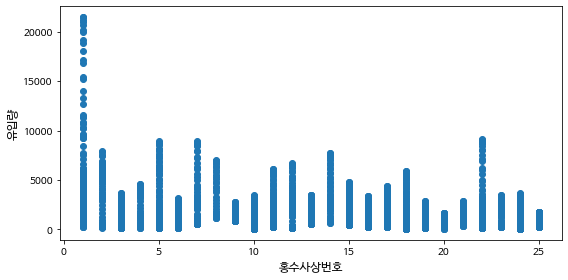

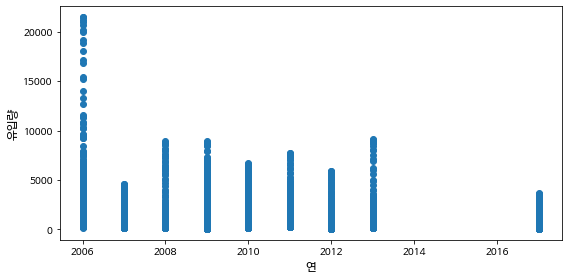

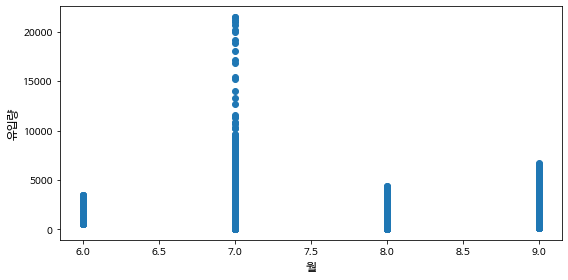

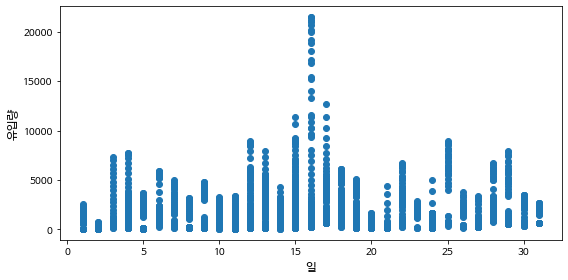

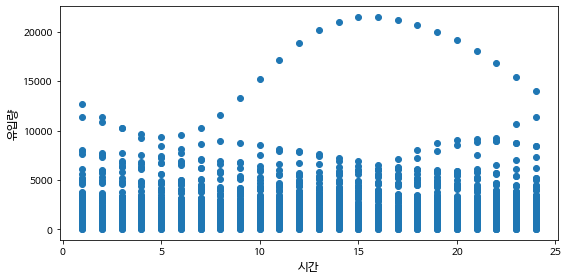

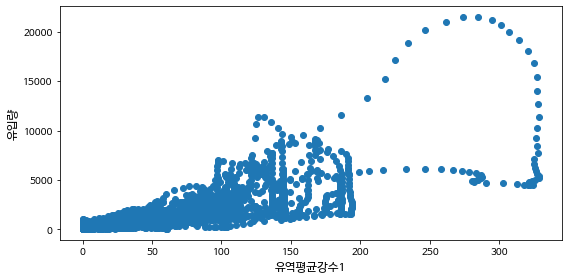

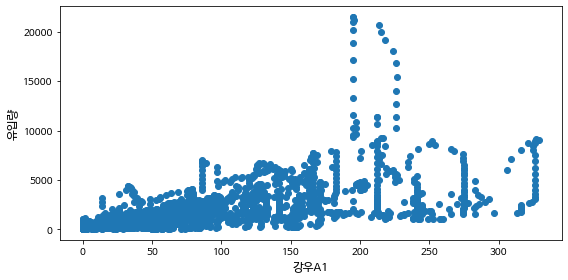

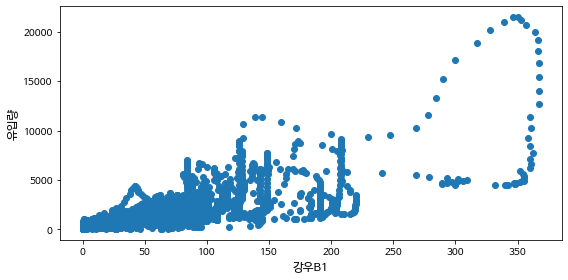

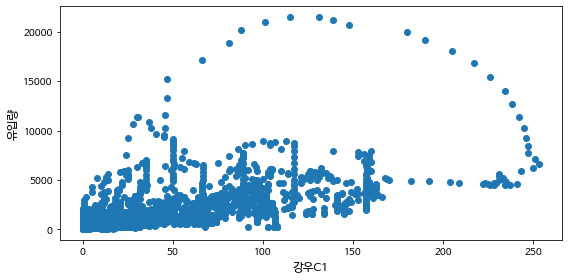

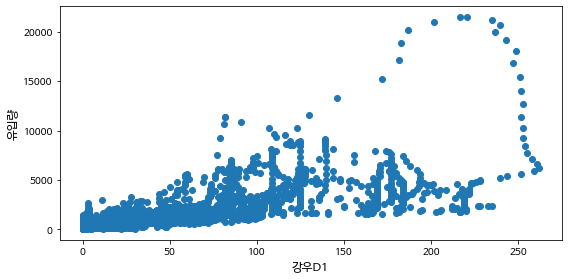

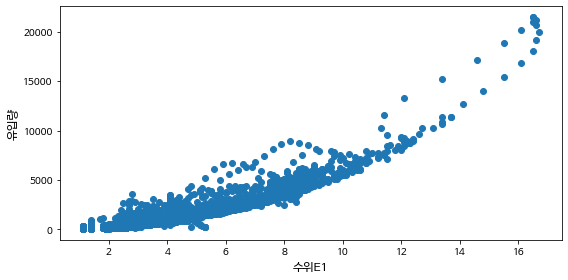

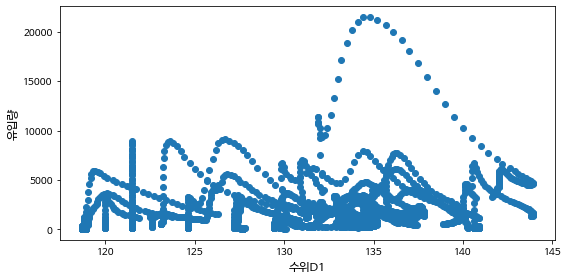

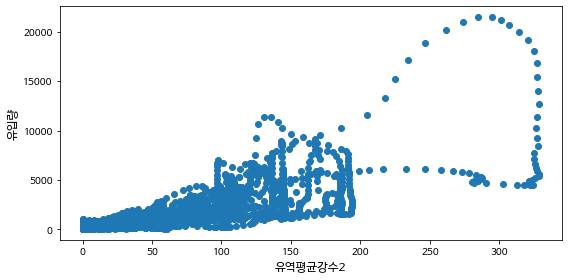

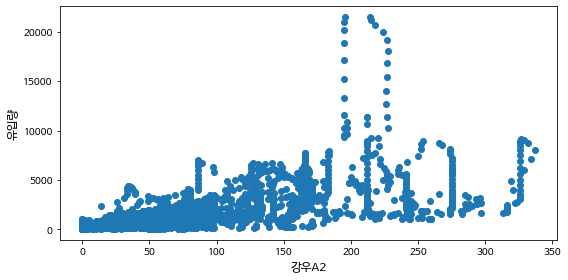

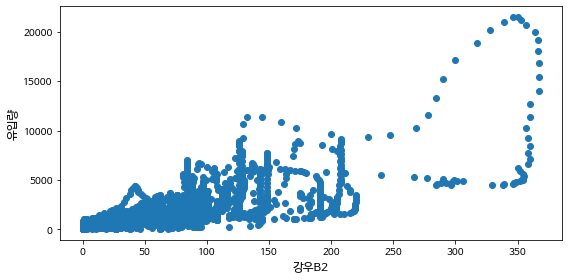

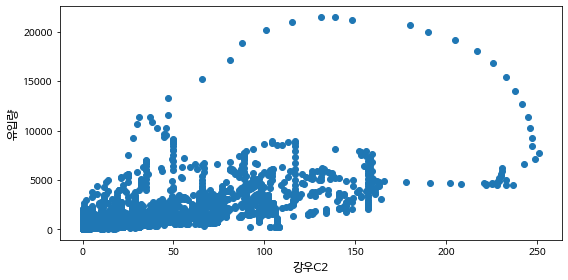

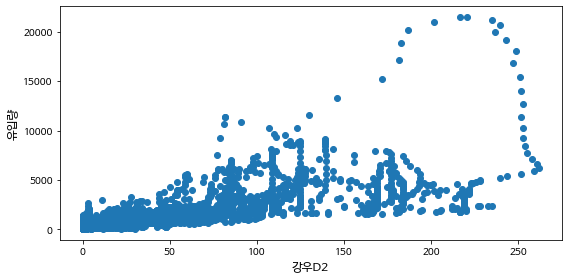

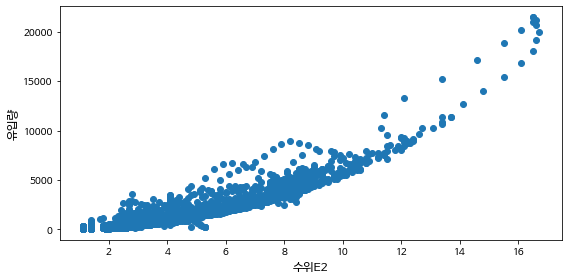

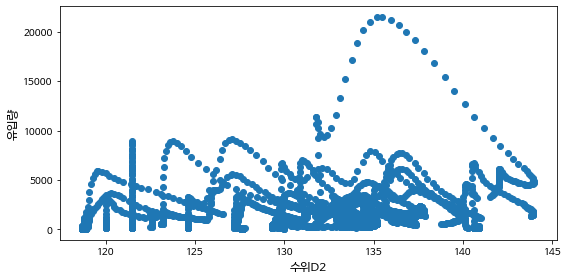

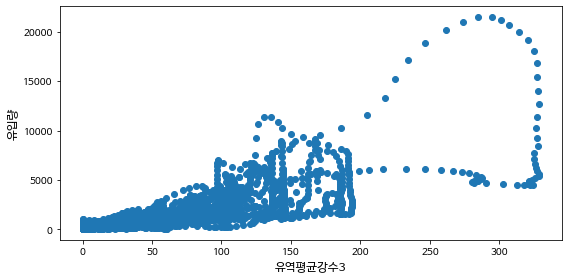

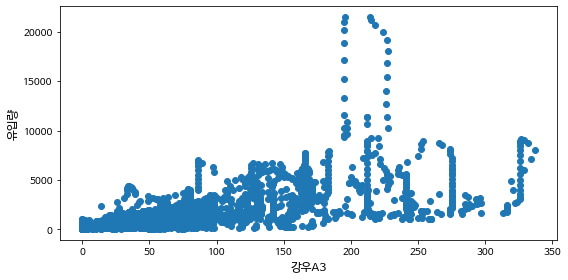

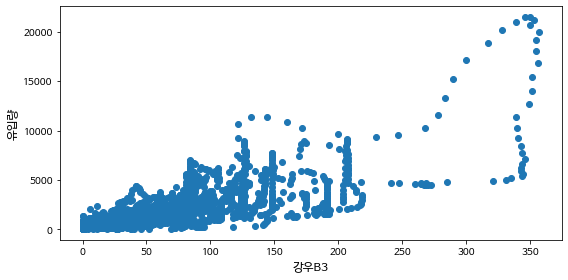

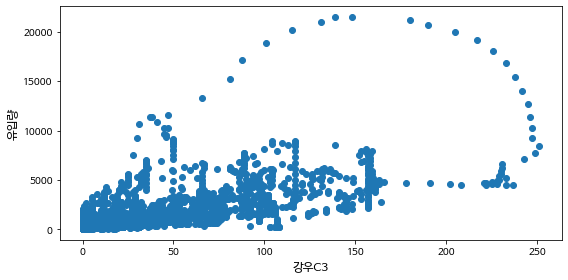

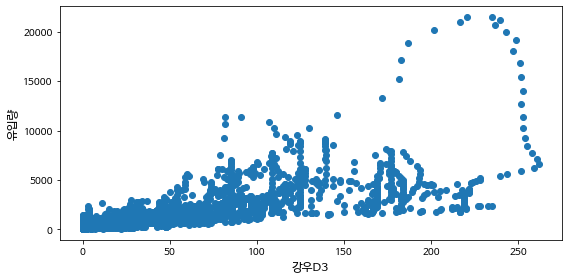

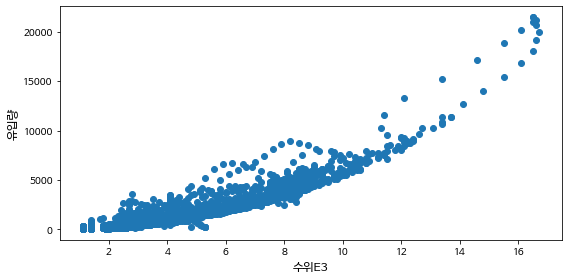

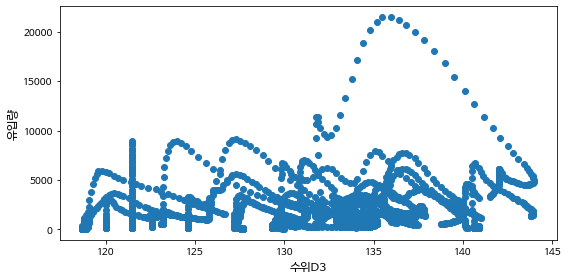

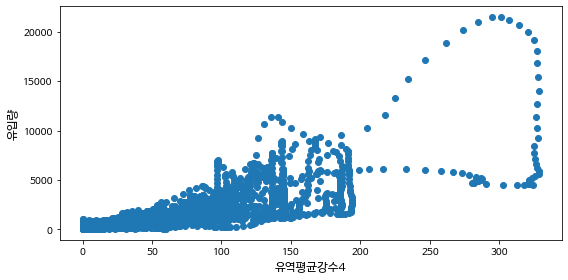

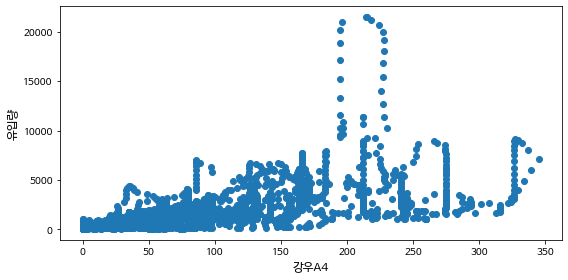

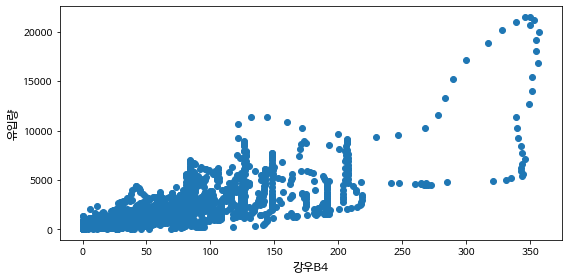

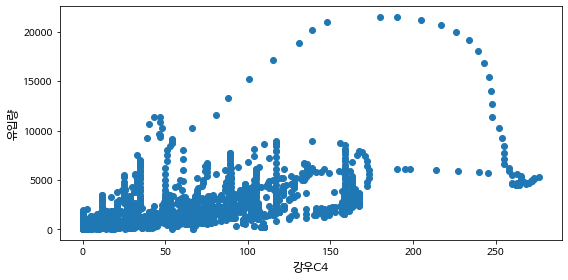

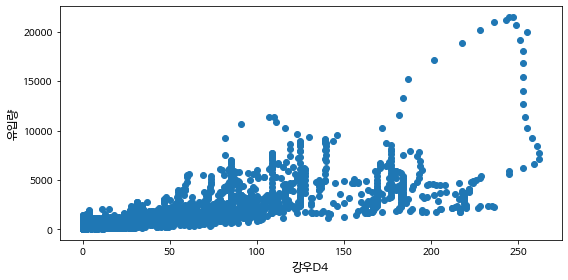

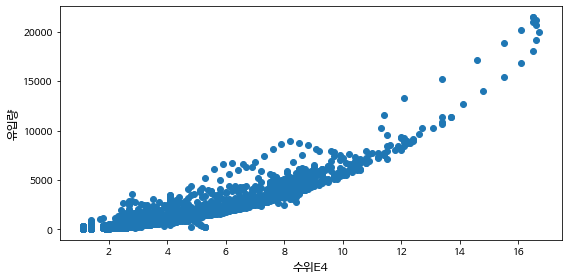

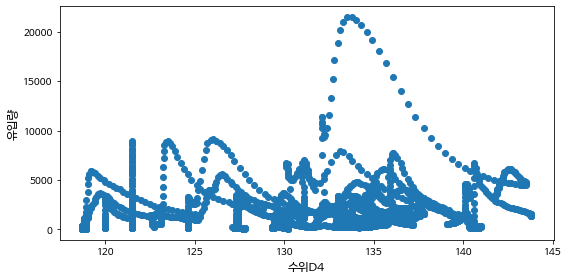

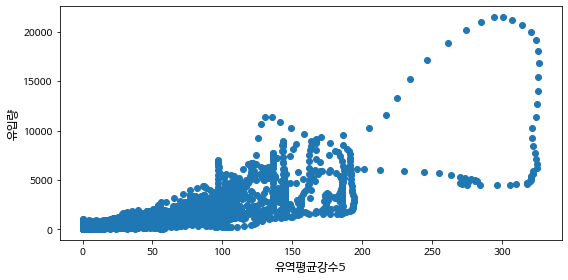

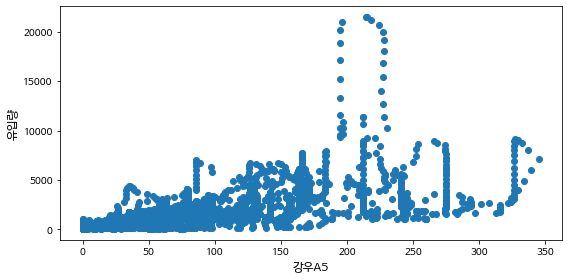

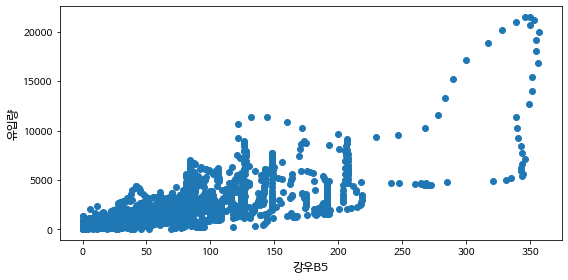

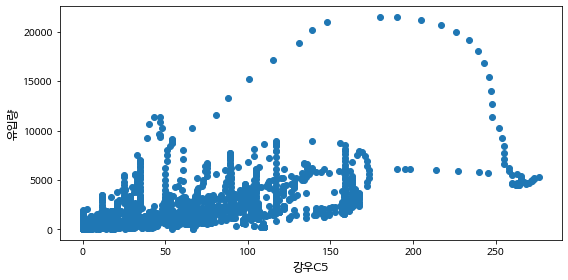

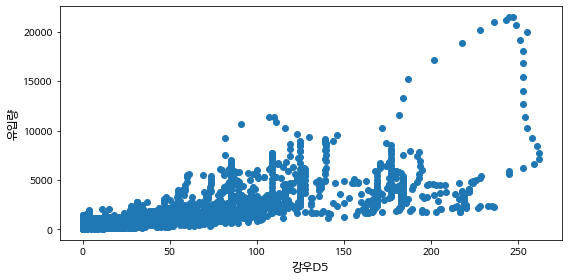

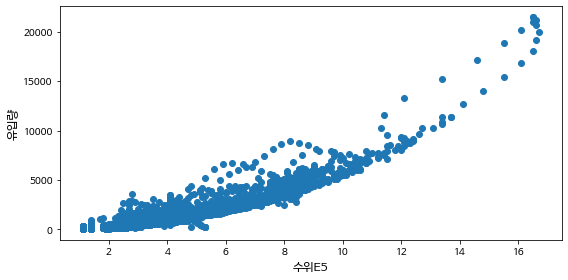

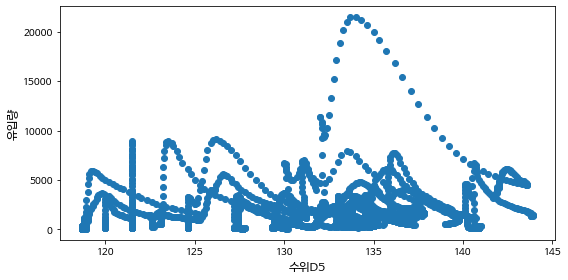

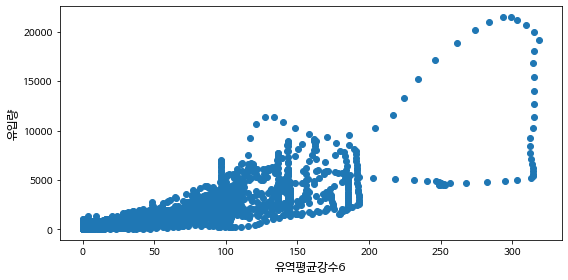

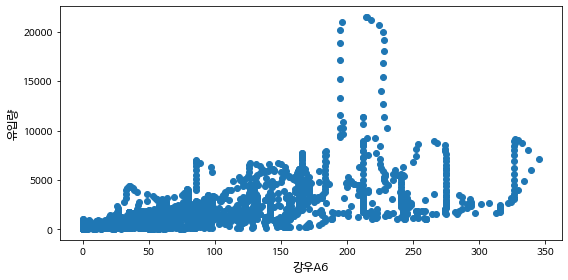

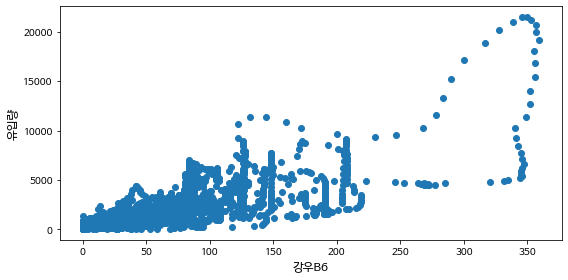

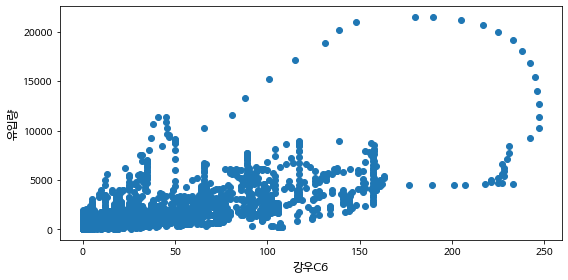

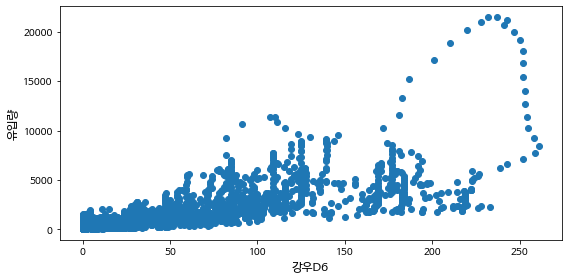

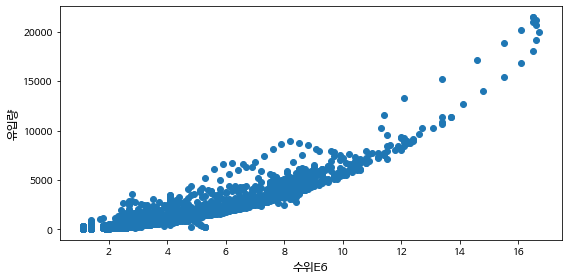

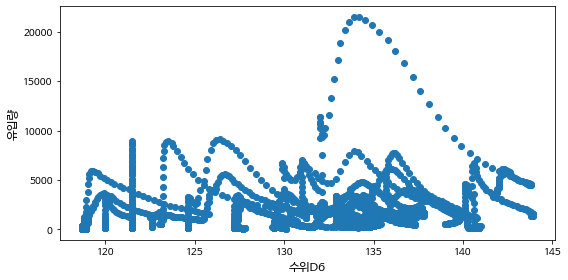

In [11]:
for i, col in enumerate(X.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(train[col], train['유입량'])
  plt.ylabel('유입량', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
model = LinearRegression()

In [15]:
X.head(3)

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1,2006,7,10,8,6.4,7,7,7,8,2.5,122.6,6.3,7,7,7,8,2.5,122.5,6.3,7,7,7,8,2.5,122.6,6.4,7,7,8,8,2.5,122.7,6.4,7,7,8,8,2.5,122.7,6.4,7,7,8,8,2.5,122.6
1,1,2006,7,10,9,6.3,7,8,7,8,2.5,122.6,6.4,7,8,7,8,2.5,122.6,6.4,7,8,7,8,2.5,122.6,7.3,7,8,10,10,2.5,122.7,7.3,7,8,10,10,2.5,122.6,7.3,7,8,10,10,2.5,122.6
2,1,2006,7,10,10,6.4,7,9,7,8,2.5,122.6,7.3,7,9,7,8,2.5,122.6,7.3,7,9,8,8,2.5,122.6,8.2,7,9,10,11,2.5,122.7,8.2,7,9,10,11,2.5,122.6,8.2,7,9,10,11,2.5,122.6


In [16]:
y.head(3)

0    189.1
1    217.0
2    251.4
Name: 유입량, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_test.head(3)

881     3178.2
2195     534.6
2889     481.1
Name: 유입량, dtype: float64

In [65]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9038709827596442
0.8861923192750704


In [37]:
from sklearn.model_selection import cross_val_score
scores = []
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

In [38]:
np.sqrt(np.mean(-scores))

966.8454514137068

In [60]:
predict = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(np.mean(mean_squared_error(y_test, predict))))
rmse

708.5232252712943